In [138]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


def data_import_save(url =  "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv", 
                         savepath = '..\\src\\data\\churn_detection_raw.csv'):
    df_temp = pd.read_csv(url)
    df_temp.to_csv(savepath)
    return df_temp

# a function that returns each colum unique values, whit the amount of uniques
def info_dados(df):
    columns = df.columns
    for column in columns:
        print(f'Column: {column}')
        print(df[column].unique(), f'Shape: {df[column].unique().shape[0]}', df[column].dtype)
        
# procura coluna com numeros inteiros que tenham apenas zeros e uns e os transforma em uint8
def zeroum_to_uint8(df):
    for column in df.columns:
        if (str(df[column].dtype).startswith('int') or str(df[column].dtype).startswith('float')) and df[column].unique().sum() == 1:
            df[column] = df[column].astype('uint8')
        

In [2]:
df_raw = data_import_save()
df = pd.get_dummies(df_raw,drop_first=True)
df

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Sim,Dependentes_Sim,TelefoneFixo_Sim,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,...,TVaCabo_Sim,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Sim,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn_Sim
0,0,1,29.85,1,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,34,56.95,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,2,53.85,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
3,0,45,42.30,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,2,70.70,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,0,1,0,0,...,1,0,1,0,1,1,0,1,0,0
7039,0,72,103.20,1,1,1,0,1,1,0,...,1,0,1,0,1,1,0,0,0,0
7040,0,11,29.60,1,1,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
7041,1,4,74.40,1,0,1,0,1,1,0,...,0,0,0,1,0,1,0,1,0,1


In [3]:
info_dados(df_raw)

Column: Maior65Anos
[0 1] Shape: 2 int64
Column: Conjuge
['Sim' 'Nao'] Shape: 2 object
Column: Dependentes
['Nao' 'Sim'] Shape: 2 object
Column: MesesDeContrato
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] Shape: 73 int64
Column: TelefoneFixo
['Nao' 'Sim'] Shape: 2 object
Column: VariasLinhasTelefonicas
['SemServicoTelefonico' 'Nao' 'Sim'] Shape: 3 object
Column: ServicoDeInternet
['DSL' 'FibraOptica' 'Nao'] Shape: 3 object
Column: SegurancaOnline
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3 object
Column: BackupOnline
['Sim' 'Nao' 'SemServicoDeInternet'] Shape: 3 object
Column: SeguroNoDispositivo
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3 object
Column: SuporteTecnico
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3 object
Column: TVaCabo
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3 object
Column: Streamin

é importante destacar que os clientes que não tem serviço online automaticamente não teriam os serviços relacionados e portanto poderiam se relacionar de forma direta ao "Não" dos dados.  
Uma análise de correlação entre essa variável "Sem serviço de internet" e o Churn pode ajudar a decidir

In [4]:
df_raw.describe(include = "all")

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
count,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,2
top,NaN,Nao,Nao,NaN,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,NaN,Nao
freq,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,5174
mean,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [149]:
print('A quantidade total de nulos nesse banco de dados é: ',df.isna().sum().sum())

A quantidade total de nulos nesse banco de dados é:  0


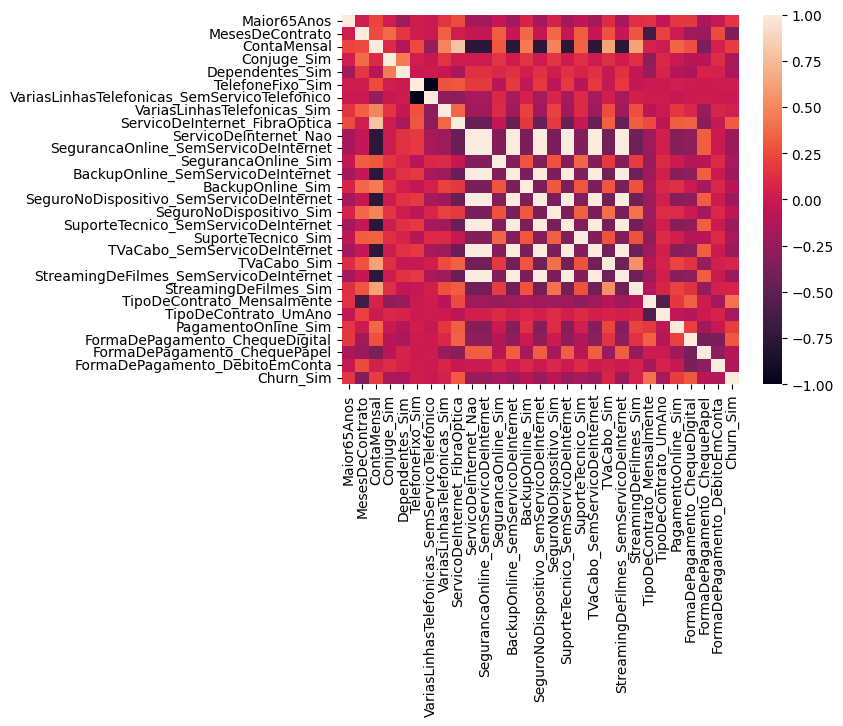

In [150]:
sns.heatmap(df.corr(),xticklabels=1, yticklabels=1)
plt.show()

A pesar de de apresentarem uma correlação fraca +- 0,2, há uma diferença entre o cliente não ter o serviço e ele ter e apenas optar por não assinar o serviço.

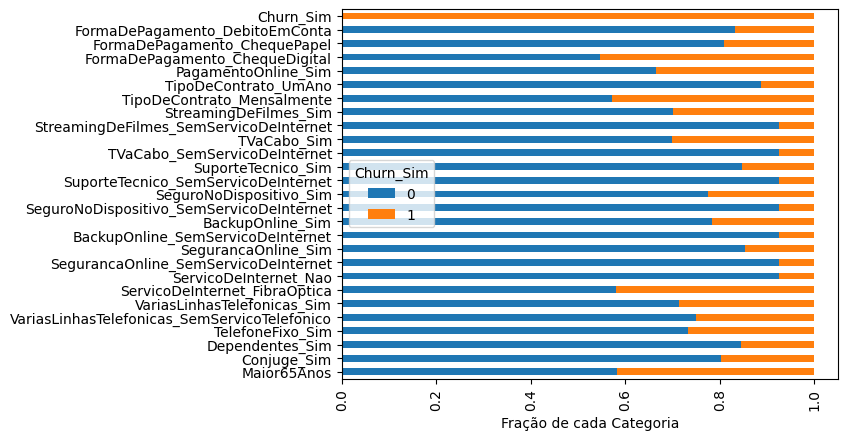

In [8]:
#Plot doas variáveis apenas com sim e não para ver se elas dividem o dataset, DESBALANCEADO
zeroum_to_uint8(df)
A = df.select_dtypes(include = 'uint8').groupby(df.Churn_Sim, sort = False).sum().div(df.select_dtypes(include = 'uint8').sum(axis=0), axis=1).T
A.plot(kind="barh", rot=0, stacked=True, )
plt.xticks(rotation = 90)
plt.xlabel('Fração de cada Categoria')
plt.show()

# Balanceamento de dados

O banco de dados está desbalanceado quanto ao Churn, um balanceamento por oversampling será feito com o SMOTE

In [9]:
# conferindo o balanceamento da target
df.Churn_Sim.value_counts()

0    5174
1    1869
Name: Churn_Sim, dtype: int64

In [10]:
y = df.Churn_Sim
X = df.drop('Churn_Sim', axis=1)

In [11]:
smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)

In [12]:
# conferindo a atarget balanceada pelo obersampling via SMOTE
y.value_counts()

0    5174
1    5174
Name: Churn_Sim, dtype: int64

In [13]:
zeroum_to_uint8(X)

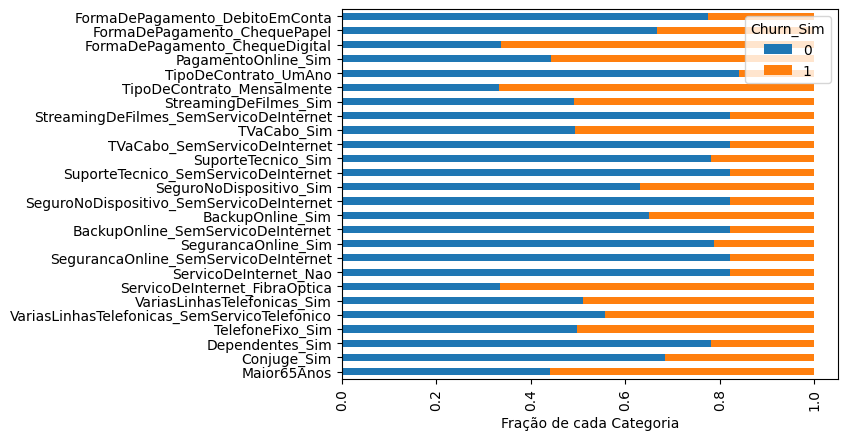

In [14]:
# Agrupa os dados binados e os somas de acordo com a categoria, dividindo em seguida para normalizar os valores
A = X.select_dtypes(include = 'uint8').groupby([y], sort = False).sum()
A = A.div(X.select_dtypes(include = 'uint8').sum(axis=0), axis=1)
A = A.T
# Faz o plot dos dados em barras horizontais de forma normalizada para observar a divisão do targuet entre os dados
A.plot(kind="barh", rot=0, stacked=True, )
plt.xticks(rotation = 90)
plt.xlabel('Fração de cada Categoria')

plt.show()

In [15]:
# A = X.select_dtypes(exclude = 'uint8').groupby([y], sort = False).sum().div(X.select_dtypes(include = 'uint8').sum(axis=0), axis=1).T
# A.iloc[3:].plot(kind="scatter", rot=0, stacked=True, )
# plt.xticks(rotation = 90)
# plt.show()
# df.plot()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7938506588579795

In [40]:
print(confusion_matrix(y_test,knn.predict(X_test)))


[[1280  450]
 [ 254 1431]]


# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

# Definindo a Árvore de decisão com profundidade máxima e com critério 
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Treinando com os dados e avaliando a precisão com os Scores
tree.fit(X_train,y_train)
area_roc_tree = roc_auc_score(y_train,tree.predict(X_train))
f1_tree = f1_score(y_train,tree.predict(X_train))
print('A área sobre a curva ROC é {:.4f}'.format(area_roc_tree))
print('O score balanceado F1 é {:.4f}'.format(f1_tree))

A área sobre a curva ROC é 0.7899
O score balanceado F1 é 0.7881


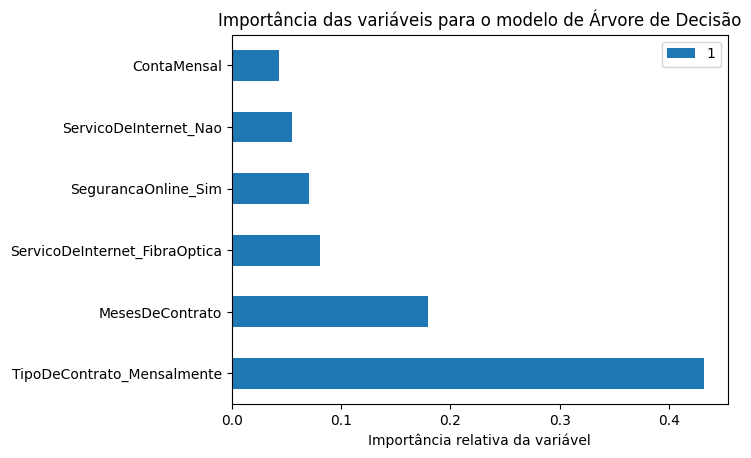

In [76]:
# Construindo a tabela com a importância de variáveis da Árvore de Decisão
a = pd.DataFrame([df.drop('Churn_Sim', axis=1).columns.tolist(),
                  tree.feature_importances_.tolist()]).T.set_index(0).sort_values(by = 1,ascending=False)
# Construindo o Gráfico
a.head(6).plot(kind = 'barh')
plt.title('Importância das variáveis para o modelo de Árvore de Decisão')
plt.xlabel('Importância relativa da variável')
plt.ylabel(None)
plt.show()

# Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='elasticnet',solver='saga', l1_ratio=0.1)
lr.fit(X_train,y_train)

area_roc_logistica = roc_auc_score(y_train,lr.predict(X_train))
f1_logistica = f1_score(y_train,lr.predict(X_train))

print('A área sobre a curva ROC é {:.4f}'.format(area_roc_logistica))
print('O score F1 é {:.4f}'.format(f1_logistica))

A área sobre a curva ROC é 0.8146
O score F1 é 0.8166


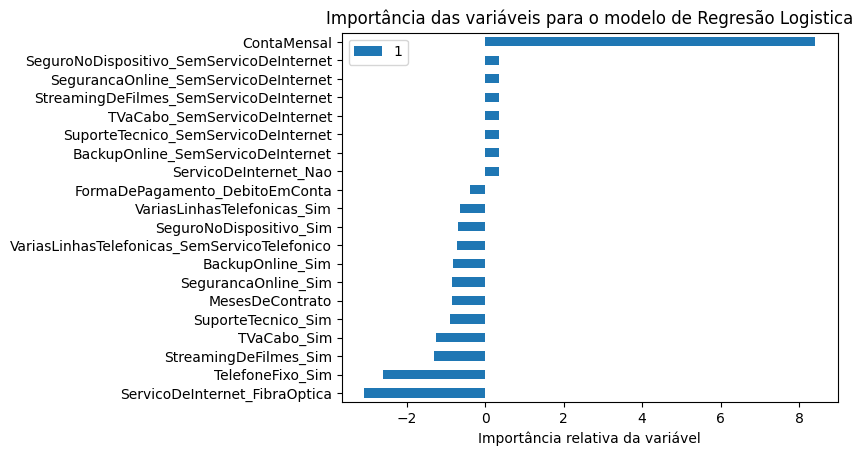

In [136]:
# Construindo a tabela com a importância de variáveis da Árvore de Decisão
a = pd.DataFrame([df.drop('Churn_Sim', axis=1).columns.tolist(),
                  lr.coef_[0].tolist()]).T.set_index(0).sort_values(by = 1,ascending=False)
# Construindo o Gráfico
a.loc[(a[1]>=0.3)|(a[1]<=-0.3)].sort_values(1).plot(kind = 'barh')
plt.title('Importância das variáveis para o modelo de Regresão Logistica')
plt.xlabel('Importância relativa da variável')
plt.ylabel(None)
plt.show()

# Comparação entre os modelos

O objetivo da análise é detectar os clientes mais provávei de deixarem a empresa e intervir e oferecer um produto.
Para isso, uma opção é avaliar seria avaliar a precisão, porém o score F1 e a área abaixo da curva ROC são melhores.

In [128]:
print('O score F1 do KNN é:',f1_score(y_test,knn.predict(X_test)))
print('O score F1 do Árvore de Decisão é:',f1_score(y_test,tree.predict(X_test)))
print('O score F1 da Regressão Logistica é:',f1_score(y_test,lr.predict(X_test)))

O score F1 do KNN é: 0.8025799214806505
O score F1 do Árvore de Decisão é: 0.7838893898406974
O score F1 da Regressão Logistica é: 0.8256227758007116


In [129]:
print('O score AUC ROC do KNN é:',roc_auc_score(y_test,knn.predict(X_test)))
print('O score AUC ROC do Árvore de Decisão é:',roc_auc_score(y_test,tree.predict(X_test)))
print('O score F1 da Regressão Logistica é:',roc_auc_score(y_test,lr.predict(X_test)))

O score AUC ROC do KNN é: 0.7945712766504864
O score AUC ROC do Árvore de Decisão é: 0.7892557589063653
O score F1 da Regressão Logistica é: 0.8277962642150221


Nas duas métricas o melhor modelo foi o KNN e o mesmo podeá fazer a previsão se um novo cliente vai deixar a empresa.
Porém a Regressão logistica e a árvore de decisão podem dar importâncias de variáveis, que podem fornecer dias de o porquê o cliente deixa a empresa.

## Análise de Churn em uma Empresa de Telefonia e Internet

Este é um estudo de caso sobre o problema de churn em uma empresa de telefonia e internet. O churn é a taxa de perda de clientes que cancelam seus serviços, e é um problema crítico que pode afetar negativamente a receita e a imagem da marca da empresa.

A empresa oferece serviços de telefonia e internet, incluindo:
> Planos de telefone fixo, de dados móveis e de banda larga.  
> Pacotes de TV a cabo, de Streaming de Filmes e de
> Serviços de Backup Online, Segurança online e Seguro de Dispositivo 

. O objetivo é identificar os principais fatores que influenciam a taxa de churn e propor soluções para reduzir essa taxa e reter os clientes.

Os dados foram coletados a partir de várias fontes, incluindo registros de clientes, informações de faturamento e logs de chamadas de suporte. O conjunto de dados contém informações demográficas dos clientes, histórico de pagamentos e uso de serviços, bem como avaliações de satisfação e feedback de atendimento ao cliente.

A análise exploratória dos dados será realizada para identificar padrões e tendências nos dados, bem como relacionamentos entre as variáveis. Em seguida, serão aplicadas técnicas de modelagem preditiva para prever a taxa de churn e identificar os principais fatores que contribuem para essa taxa. Também serão propostas soluções para reduzir a taxa de churn, como melhorar a qualidade do serviço, ajustar preços, oferecer promoções e incentivos de fidelização, e melhorar o atendimento ao cliente.

O resultado esperado é fornecer insights valiosos sobre o problema de churn em uma empresa de telefonia e internet e fornecer recomendações práticas para reduzir essa taxa e reter os clientes.



# Inclusão da Pipeline

In [147]:
# Substituindo sim e nao por valores boleanos
df_raw['Churn'] = df_raw.Churn.replace({'Nao':0,'Sim':1})

# separando os dados brutos em Treino e Teste Para não vazar informação nos imputs
df_train, df_test = train_test_split(df_raw, test_size=0.33, random_state=42)

# criando listas de colunas que tenham valores numeticos e objetos
lista_num = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' not in str(df_raw[col].dtype)]
lista_obj = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' in str(df_raw[col].dtype)]

#definindo o encoder para codificar as categorias e o scaler para normalizar as vriáveis numéricas
encoder = OneHotEncoder()
scaler = StandardScaler()

# definindo o tipo de balanceamento que será feito
balancer = SMOTE()

#definindo o modelo
model = lr

# definindo os pacos da pipeline de preprocessamento
steps_num = [('scaler',scaler)]
steps_cat = [('encoder',encoder)]

# Definindo a pipelinde de preprocessamento numerica e categorica
pipe_num = Pipeline(steps_num)
pipe_cat = Pipeline(steps_cat)

# Definindo a pipeline de preprocessamentro completa
pre_process = ColumnTransformer(transformers=[('num', pipe_num,lista_num),('cat',pipe_cat,lista_obj)])


# Definindo os pacos da pipeline
step = [('pre_process',pre_process),('balancer',balancer),('model',model)]

# Definindo a pipeline que teá os passos do step
pipe = Pipeline(step)

# Fazendo o fit nos dados de treino
pipe.fit(df_train,df_train.Churn)

# Fazendo o Predict e já retornando os scores            
score = roc_auc_score(df_test.Churn,pipe.predict(df_test))
score_f1 = f1_score(df_test.Churn,pipe.predict(df_test))
print('A área sobre a curva ROC é {:.4f}'.format(score))
print('O score F1 é {:.4f}'.format(score_f1))



A área sobre a curva ROC é 0.7782
O score F1 é 0.6489


## usando a Pipeline para avaliar diferentes balanceadores e diferentes modelos

In [151]:
# separando os dados brutos em Treino e Teste Para não vazar informação nos imputs
df_train, df_test = train_test_split(df_raw, test_size=0.33, random_state=42)

# criando listas de colunas que tenham valores numeticos e objetos
lista_num = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' not in str(df_raw[col].dtype)]
lista_obj = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' in str(df_raw[col].dtype)]

#definindo o encoder para codificar as categorias e o scaler para normalizar as vriáveis numéricas
encoder = OneHotEncoder()
scaler = StandardScaler()

# definindo o tipo de balanceamento que será feito
balancer = SMOTE()

#definindo o modelo
model = lr

# definindo os pacos da pipeline de preprocessamento
steps_num = [('scaler',scaler)]
steps_cat = [('encoder',encoder)]

# Definindo a pipelinde de preprocessamento numerica e categorica
pipe_num = Pipeline(steps_num)
pipe_cat = Pipeline(steps_cat)

# Definindo a pipeline de preprocessamentro completa
pre_process = ColumnTransformer(transformers=[('num', pipe_num,lista_num),('cat',pipe_cat,lista_obj)])

# Definindo a lista de modelos que serão testados e definindo seus hiperparâmetros
lista_modelo = [KNeighborsClassifier(n_neighbors=10),LogisticRegression(),
                DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5),
               GradientBoostingClassifier(n_estimators=30)]

# Definindo a lista de tecnicas de balanceamento de dados a serem testadas
lista_balancer = [SMOTE(),RandomUnderSampler(),NeighbourhoodCleaningRule(n_neighbors=5)]

# Executando um loop que vai passar por diversos modelos e testar os diferentes balanceamentos e cada modelo
for model in lista_modelo:
    for balancer in lista_balancer:
        step = [('pre_process',pre_process),('balancer',balancer),('model',model)]

        pipe = Pipeline(step)
        pipe.fit(df_train,df_train.Churn)
            
        score = roc_auc_score(df_test.Churn,pipe.predict(df_test))
        score_f1 = f1_score(df_test.Churn,pipe.predict(df_test))
        print(model, balancer, 'ROC_AUC Score: {:.4f}'.format(score),'F1 Score: {:.4f}'.format(score_f1))
    print('')
        

KNeighborsClassifier(n_neighbors=10) SMOTE() ROC_AUC Score: 0.7422 F1 Score: 0.6035
KNeighborsClassifier(n_neighbors=10) RandomUnderSampler() ROC_AUC Score: 0.7564 F1 Score: 0.6187
KNeighborsClassifier(n_neighbors=10) NeighbourhoodCleaningRule(n_neighbors=5) ROC_AUC Score: 0.7617 F1 Score: 0.6198

LogisticRegression() SMOTE() ROC_AUC Score: 0.7805 F1 Score: 0.6496
LogisticRegression() RandomUnderSampler() ROC_AUC Score: 0.7820 F1 Score: 0.6498
LogisticRegression() NeighbourhoodCleaningRule(n_neighbors=5) ROC_AUC Score: 0.7736 F1 Score: 0.6369

DecisionTreeClassifier(max_depth=5) SMOTE() ROC_AUC Score: 0.7376 F1 Score: 0.6068
DecisionTreeClassifier(max_depth=5) RandomUnderSampler() ROC_AUC Score: 0.7592 F1 Score: 0.6298
DecisionTreeClassifier(max_depth=5) NeighbourhoodCleaningRule(n_neighbors=5) ROC_AUC Score: 0.7675 F1 Score: 0.6299

RandomForestClassifier(max_depth=5) SMOTE() ROC_AUC Score: 0.7671 F1 Score: 0.6371
RandomForestClassifier(max_depth=5) RandomUnderSampler() ROC_AUC Score:

## Usando a pipeline para realizar um gridsearch no melhor modelo e no melhor balanceamento

In [153]:
from sklearn.model_selection import GridSearchCV

In [157]:
# Substituindo sim e nao por valores boleanos
df_raw['Churn'] = df_raw.Churn.replace({'Nao':0,'Sim':1})

# separando os dados brutos em Treino e Teste Para não vazar informação nos imputs
df_train, df_test = train_test_split(df_raw, test_size=0.33, random_state=42)

# criando listas de colunas que tenham valores numeticos e objetos
lista_num = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' not in str(df_raw[col].dtype)]
lista_obj = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' in str(df_raw[col].dtype)]

#definindo o encoder para codificar as categorias e o scaler para normalizar as vriáveis numéricas
encoder = OneHotEncoder()
scaler = StandardScaler()

# definindo o tipo de balanceamento que será feito
balancer = SMOTE()

#definindo o modelo
model = GradientBoostingClassifier(n_estimators=30)

# definindo os pacos da pipeline de preprocessamento
steps_num = [('scaler',scaler)]
steps_cat = [('encoder',encoder)]

# Definindo a pipelinde de preprocessamento numerica e categorica
pipe_num = Pipeline(steps_num)
pipe_cat = Pipeline(steps_cat)

# Definindo a pipeline de preprocessamentro completa
pre_process = ColumnTransformer(transformers=[('num', pipe_num,lista_num),('cat',pipe_cat,lista_obj)])


# Definindo os pacos da pipeline
step = [('pre_process',pre_process),('balancer',balancer),('model',model)]

# Definindo a pipeline que teá os passos do step
pipe = Pipeline(step)

# Definindo a lista de parâmetros
param = {'model__n_estimators':[10,50,100,200], 'model__max_depth':[1,2,3,4]}

# Definindo o Gridsearch com score F1
gcv = GridSearchCV(pipe,scoring='f1',n_jobs=-1, param_grid=param)

# Treinando o gridsearch com dados de treino
gcv.fit(df_train,df_train.Churn)

A melhor profundidade foi de  2
O melhor numero de estimadores foi de  100


In [160]:
# Retornando a melhor combinanção dos parâmetros avaliados
print('A melhor profundidade foi de ',gcv.best_params_['model__max_depth'])
print('O melhor numero de estimadores foi de ',gcv.best_params_['model__n_estimators'])

# definindo o melhor modelo
melhor_modelo = gcv.best_estimator_

# avaliando o melhor modelo
print('O score F1 dos dados totais de treino é {:.4f}'.format(f1_score(df_train.Churn,melhor_modelo.predict(df_train))))
print('O score F1 dos dados de teste é {:.4f}'.format(f1_score(df_test.Churn,melhor_modelo.predict(df_test))))


A melhor profundidade foi de  2
O melhor numero de estimadores foi de  100
O score F1 dos dados totais de treino é 0.6380
O score F1 dos dados de teste é 0.6549


## Usando SHAP para retornar a importância das variáveis na previsão

In [161]:
import shap

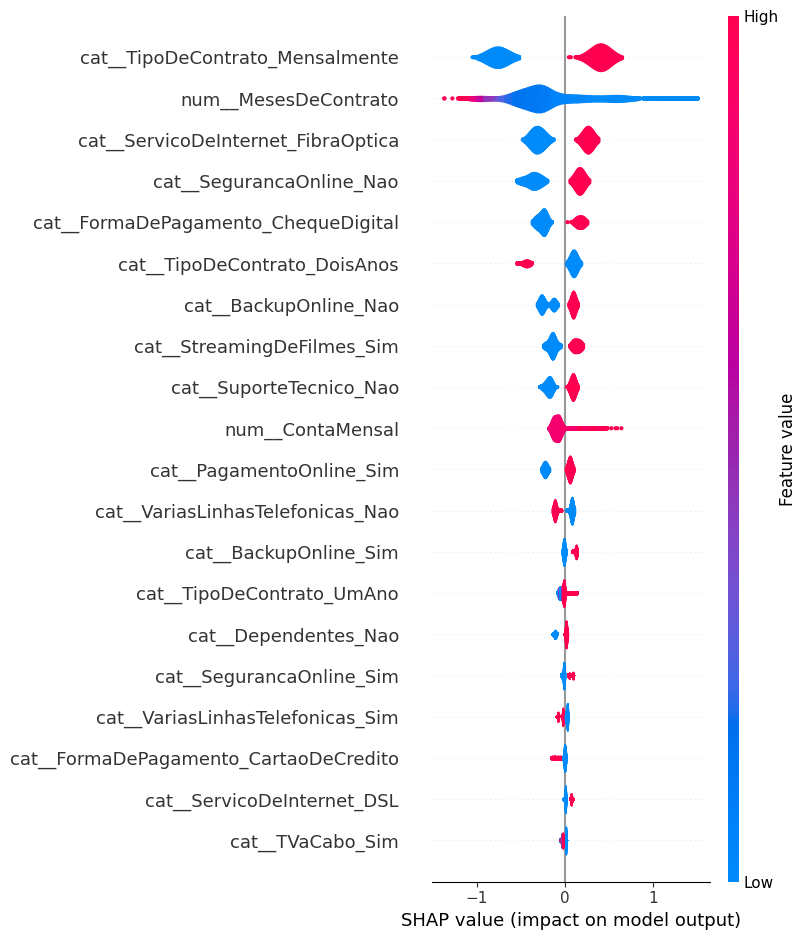

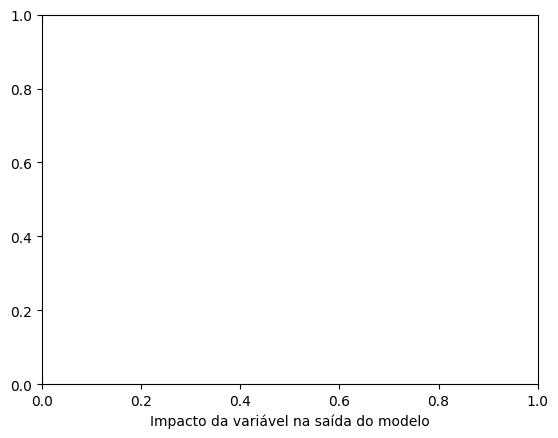

In [173]:
# definindo o modelo de explicação do tipo gradient boost de arvores
explainer = shap.TreeExplainer(melhor_modelo['model'])

# separando os dados brutos em Treino e Teste Para não vazar informação nos imputs
df_train, df_test = train_test_split(df_raw, test_size=0.33, random_state=42)

# separando X e y dos dados de treino e aplicando o preprocessamento da pipeline em X
X = melhor_modelo['pre_process'].transform(df_train)
y = df_train.Churn

# retornando os valores shap do explicador
shap_values = explainer.shap_values(X,y)

# Definindo o nome das variaveis e retornando um gráfico violino das previsões em função do Churn
feature_names=melhor_modelo['pre_process'].get_feature_names_out()
fig = shap.summary_plot(
    shap_values, 
    X, 
    feature_names = feature_names,
    plot_type='violin',
    layered_violin_max_num_bins=1000)

plt.xlabel('Impacto da variável na saída do modelo')
plt.show(fig)




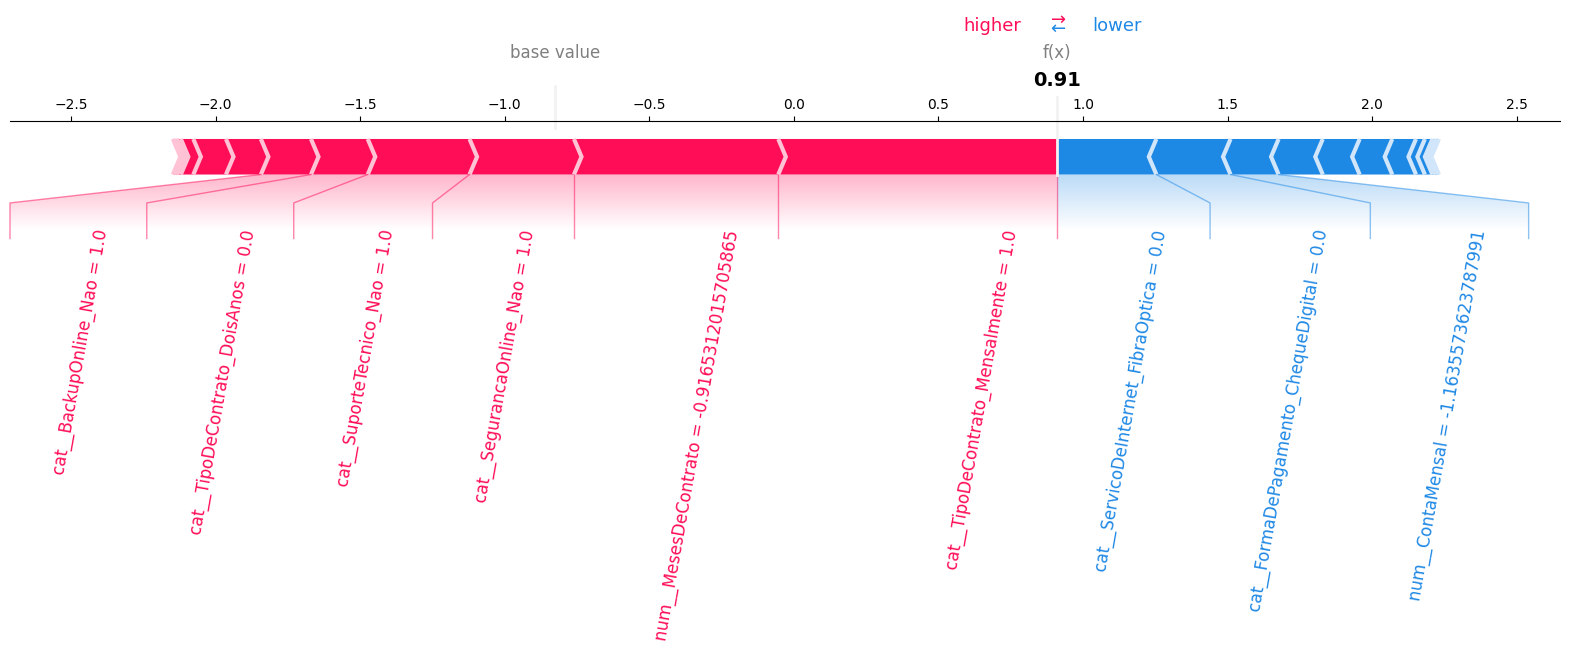

In [97]:


shap.force_plot(
    explainer.expected_value, 
    shap_values[1,:], 
    X[1,:], 
    matplotlib=True, 
    feature_names=melhor_modelo['pre_process'].get_feature_names_out(), 
    text_rotation=80 )